# <font color=blue>Assignments for "Assumptions of Linear Regression"</font>

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from Kaggle.
- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.
- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import warnings

warnings.filterwarnings("ignore")

In [2]:
weather = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\weatherHistory.csv")

In [3]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
weather.drop(weather[weather["Precip Type"].isnull() == True].index, axis = 0, inplace = True)
weather.reset_index(drop = True, inplace = True)

In [5]:
weather.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = weather[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]

In [8]:
X.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,0.89,14.1197,251.0,1015.13
1,0.86,14.2646,259.0,1015.63
2,0.89,3.9284,204.0,1015.94
3,0.83,14.1036,269.0,1016.41
4,0.83,11.0446,259.0,1016.51


In [9]:
y = weather["Temperature (C)"]

In [10]:
y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [12]:
linear = LinearRegression()

In [13]:
linear.fit(X_train, y_train)

LinearRegression()

In [14]:
y_testPred = linear.predict(X_test)

In [15]:
import statsmodels.api as sm

In [16]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:30:30   Log-Likelihood:            -2.6132e+05
No. Observations:               76748   AIC:                         5.226e+05
Df Residuals:                   76743   BIC:                         5.227e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.8411      0.259    146.314      0.000      37.334      38.348
Humidity                 -32.4775      0.138   -235.533      0.000     -32.748     -32.207
Wind Speed (km/h)         -0.1977      0.004    -50.325      0.000      -0.205      -0.190
Wind Bearing (degrees)     0.0039      0.000     15.682      0.000       0.003       0.004
Pressure (millibars)      -0.0006      0.000     -2.762      0.006      -0.001      -0.000
==============================================================================
Omnibus:                     2718.720   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3062.936
Skew:                          -0.457   Prob(JB):                         0.00
Kurtosis:                       3.349   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

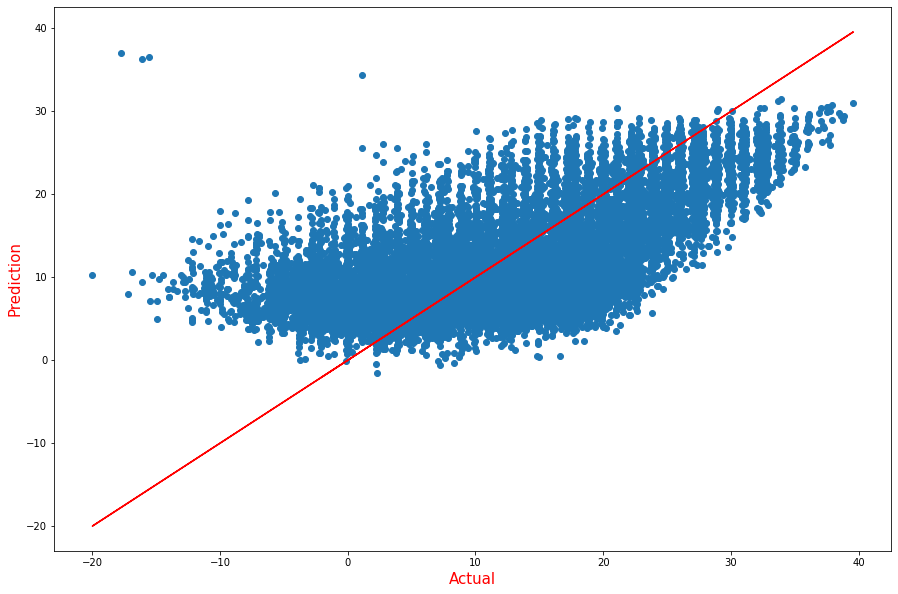

In [17]:
plt.figure(figsize = (15,10))
plt.scatter(x = y_test, y = y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", color = "red", size = (15))
plt.ylabel("Prediction", color = "red", size = (15))
plt.show()

***Apparently it doesn't.***

## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle. 
- Reimplement the model you built in the previous lesson. 
- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

In [18]:
house = pd.read_csv(r"C:\Users\Kleerys\Desktop\Assignments for Regression_Problems\.ipynb_checkpoints\train.csv")

In [19]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
a = pd.DataFrame()
for col in house.columns:
    if (house[col].isnull().sum() >= 100):
        a = pd.concat([a, house[col]], axis = 1, names = [col])
display(a)
print(a.info())

,LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,65.0,NaN,NaN,NaN,NaN,NaN
1,80.0,NaN,TA,NaN,NaN,NaN
2,68.0,NaN,TA,NaN,NaN,NaN
3,60.0,NaN,Gd,NaN,NaN,NaN
4,84.0,NaN,TA,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,62.0,NaN,TA,NaN,NaN,NaN
1456,85.0,NaN,TA,NaN,MnPrv,NaN
1457,66.0,NaN,Gd,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   Alley        91 non-null     object 
 2   FireplaceQu  770 non-null    object 
 3   PoolQC       7 non-null      object 
 4   Fence        281 non-null    object 
 5   MiscFeature  54 non-null     object 
dtypes: float64(1), object(5)
memory usage: 79.8+ KB
None


In [22]:
for col in a.columns:
    print(a[col].unique())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
[nan 'Grvl' 'Pave']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [23]:
for col in house.columns:
    if col not in a.columns:
        house.drop(house[house[col].isnull()].index, inplace = True)
        house.reset_index(drop = True, inplace = True)
        a.drop(house[house[col].isnull()].index, inplace = True)
        a.reset_index(drop = True, inplace = True)

In [24]:
for col in house.columns:
    if house[col].isnull().sum() != 0:
        print("*****")
        print("{} feature has {} null values.".format(col, house[col].isnull().sum()))
print("*-*-*-*-*-*")
print("The features that has no null-values are not displayed.")

*****
LotFrontage feature has 244 null values.
*****
Alley feature has 1257 null values.
*****
FireplaceQu feature has 591 null values.
*****
PoolQC feature has 1331 null values.
*****
Fence feature has 1077 null values.
*****
MiscFeature feature has 1289 null values.
*-*-*-*-*-*
The features that has no null-values are not displayed.


In [25]:
print("Filling Lot Frontage By Feature's Mean")
mean = np.mean(house.LotFrontage.dropna())
for index in house.index:
    if np.isnan(house.LotFrontage.iloc[index]):
        house.LotFrontage.iloc[index] = mean
print("Done! Check!")
print("{} column has {} null values.".format("LotFrontage", house.LotFrontage.isnull().sum()))

Filling Lot Frontage By Feature's Mean
Done! Check!
LotFrontage column has 0 null values.


In [28]:
import scipy.stats as scis

In [29]:
def drop (target):
    z = scis.zscore(house["SalePrice"])
    limit = 4 * np.std(house["SalePrice"]) + np.mean(house["SalePrice"])
    house.drop(house[house["SalePrice"] >= limit].index, axis = 0, inplace = True)
    house.reset_index(drop = True, inplace = True)
    return house

In [30]:
z = scis.zscore(house["SalePrice"])
while (len(np.where(z > 4)[0]) != 0):
    z = scis.zscore(house["SalePrice"])
    house = drop(house["SalePrice"])
    print("*****")
    print("Threshold value: {}".format(4))
    print("Numbers of outliers: {}".format(len(np.where(z > 4)[0])))

*****
Threshold value: 4
Numbers of outliers: 8
*****
Threshold value: 4
Numbers of outliers: 3
*****
Threshold value: 4
Numbers of outliers: 1
*****
Threshold value: 4
Numbers of outliers: 0


In [31]:
y = house["SalePrice"]
X = house.drop("SalePrice", axis = 1)

In [32]:
for col in X.columns:
    try:
        np.mean(X[col])
    except:
        X.drop(col, axis = 1, inplace = True)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [35]:
linear = LinearRegression()

In [36]:
linear.fit(X_train, y_train)

LinearRegression()

In [37]:
import statsmodels.api as sm

In [38]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     122.6
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:58:32   Log-Likelihood:                -12448.
No. Observations:                1060   AIC:                         2.497e+04
Df Residuals:                    1024   BIC:                         2.515e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.455e+05   1.49e+06     -0.098      0.922   -3.06e+06    2.77e+06
Id               -3.7868      2.296     -1.649      0.099      -8.292       0.718
MSSubClass     -173.1588     29.295     -5.911      0.000    -230.643    -115.675
LotFrontage    -128.3314     52.622     -2.439      0.015    -231.590     -25.073
LotArea           0.2609      0.127      2.055      0.040       0.012       0.510
OverallQual    1.816e+04   1258.770     14.425      0.000    1.57e+04    2.06e+04
OverallCond    5138.5410   1159.601      4.431      0.000    2863.074    7414.007
YearBuilt       457.1694     82.621      5.533      0.000     295.044     619.295
YearRemodAdd    245.7391     76.797      3.200      0.001      95.041     396.437
MasVnrArea       20.9063      6.528      3.202      0.001       8.096      33.717
BsmtFinSF1        6.1357      2.703      2.270      0.023       0.832      11.440
BsmtFinSF2       -0.7058      4.582     -0.154      0.878      -9.696       8.285
BsmtUnfSF        -1.7180      2.768     -0.621      0.535      -7.150       3.714
TotalBsmtSF       3.7118      4.698      0.790      0.430      -5.507      12.931
1stFlrSF         13.9502      7.818      1.784      0.075      -1.391      29.291
2ndFlrSF         15.5664      6.733      2.312      0.021       2.355      28.778
LowQualFinSF     -9.0862     18.465     -0.492      0.623     -45.319      27.147
GrLivArea        20.4304      7.007      2.916      0.004       6.681      34.179
BsmtFullBath    1.04e+04   2792.144      3.725      0.000    4922.938    1.59e+04
BsmtHalfBath   -849.9688   4315.681     -0.197      0.844   -9318.557    7618.620
FullBath         70.3054   3073.771      0.023      0.982   -5961.305    6101.916
HalfBath      -4576.9825   2873.270     -1.593      0.111   -1.02e+04    1061.186
BedroomAbvGr  -4695.2206   1874.651     -2.505      0.012   -8373.817   -1016.624
KitchenAbvGr  -1.841e+04   6755.820     -2.725      0.007   -3.17e+04   -5153.034
TotRmsAbvGrd   4598.3850   1352.801      3.399      0.001    1943.806    7252.964
Fireplaces     6939.1793   1898.156      3.656      0.000    3214.460    1.07e+04
GarageYrBlt    -201.4130     83.857     -2.402      0.016    -365.963     -36.863
GarageCars     1.649e+04   3069.934      5.373      0.000    1.05e+04    2.25e+04
GarageArea       15.5613     10.608      1.467      0.143      -5.255      36.377
WoodDeckSF       28.6244      8.322      3.440      0.001      12.294      44.955
OpenPorchSF      17.5321     15.993      1.096      0.273     -13.851      48.916
EnclosedPorch    23.7673     17.978      1.322      0.186     -11.511      59.046
3SsnPorch        56.3509     33.548      1.680      0.093      -9.480     122.182
ScreenPorch      42.1153     17.422      2.417      0.016       7.928      76.302
PoolArea        -78.6857     22.939     -3.430   

In [39]:
y_testPred = linear.predict(X_test)

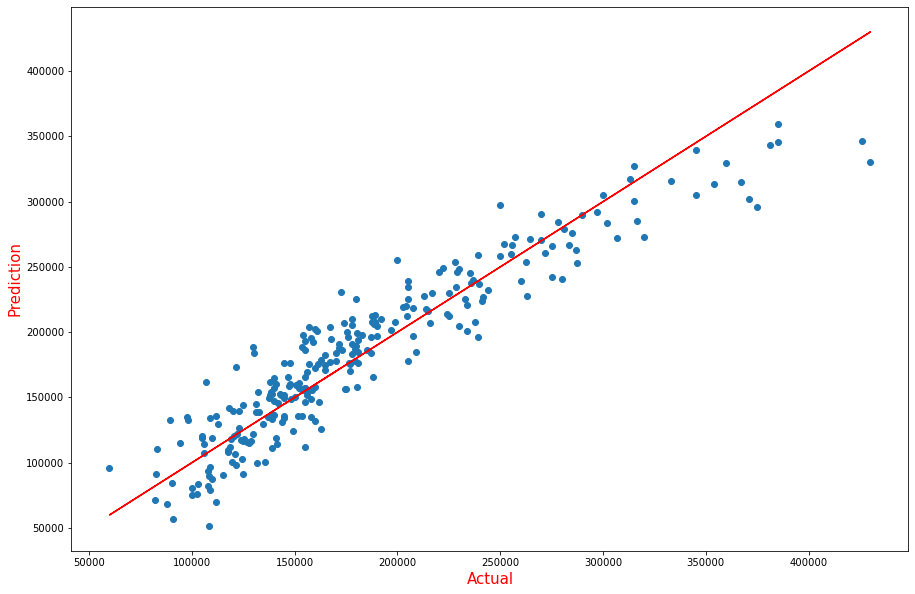

In [40]:
plt.figure(figsize = (15,10))
plt.scatter(x = y_test, y = y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", color = "red", size = (15))
plt.ylabel("Prediction", color = "red", size = (15))
plt.show()